### Dataset Information
The dataset used in this analysis is the [Healthcare Dataset](https://www.kaggle.com/datasets/prasad22/healthcare-dataset) by Prasad22, available on Kaggle.

It contains details about patient demographics, medical conditions, and billing information. The dataset was downloaded on 12/9/24.

**Source**: [Kaggle - Healthcare Dataset](https://www.kaggle.com/datasets/prasad22/healthcare-dataset)

In [1]:
import pandas as pd

file_path = '/Users/alejandrascheuren/Downloads/healthcare data 2.csv'
data = pd.read_csv(file_path)

print("Dataset Overview:")
print(data.head())

Dataset Overview:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   30    Male         B-            Cancer        2024-01-31   
1   Leslie Terry   62    Male         A+           Obesity        2019-08-20   
2    Danny Smith   76  Female         A-           Obesity        2022-09-22   
3   Andrew Watts   28  Female         O+          Diabetes        2020-11-18   
4  Adrienne Bell   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0  

In [2]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [5]:
#DATA CLEANING
#subset for positive and negative billing 
positive_billing = data[data['Billing Amount'] >= 0]
negative_billing = data[data['Billing Amount'] < 0]

print(f"Positive Billing Amounts: {len(positive_billing)}")
print(f"Negative Billing Amounts: {len(negative_billing)}")


Positive Billing Amounts: 55392
Negative Billing Amounts: 108


In [7]:
#Date columns to datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

print(data[['Date of Admission', 'Discharge Date']].head())

  Date of Admission Discharge Date
0        2024-01-31     2024-02-02
1        2019-08-20     2019-08-26
2        2022-09-22     2022-10-07
3        2020-11-18     2020-12-18
4        2022-09-19     2022-10-09


In [9]:
# Identify invalid room numbers
invalid_rooms = data[(data['Room Number'] < 101) | (data['Room Number'] > 500)]

print(f"Invalid Room Numbers Found: {len(invalid_rooms)}")
if len(invalid_rooms) > 0:
    print(invalid_rooms[['Room Number']])
else:
    print("All room numbers are valid.")

Invalid Room Numbers Found: 0
All room numbers are valid.


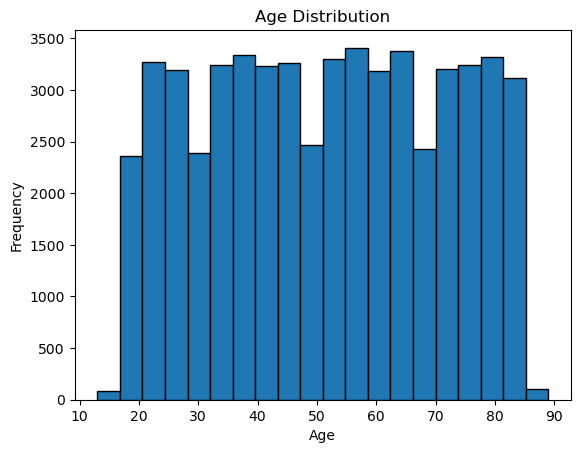

In [11]:
#EDA on demographics
import matplotlib.pyplot as plt

#chart for age distribution
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

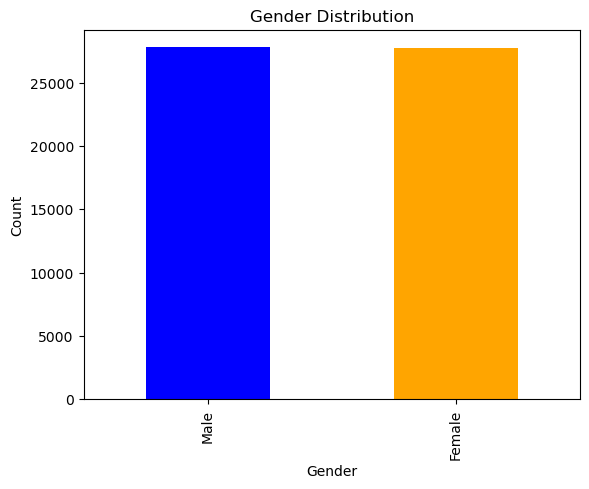

In [13]:
#gender counts
gender_counts = data['Gender'].value_counts()

#bar chart for gender
gender_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

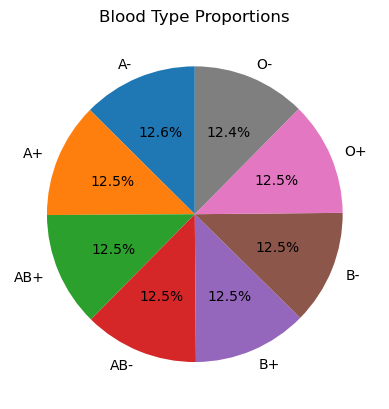

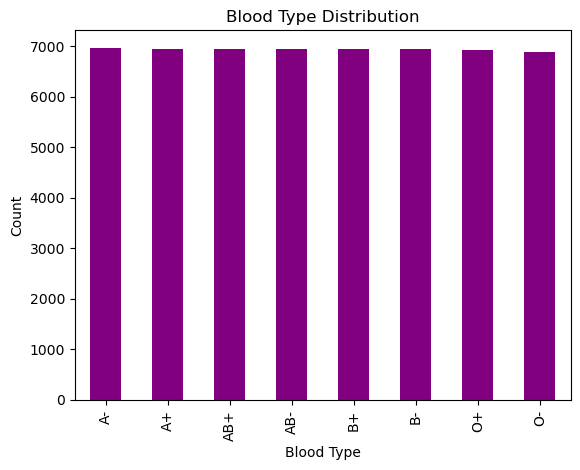

In [15]:
#blood type counts
blood_type_counts = data['Blood Type'].value_counts()

#pie chart for blood type
blood_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Blood Type Proportions")
plt.ylabel("")  # Remove default ylabel for better formatting
plt.show()

#bar chart for blood type
blood_type_counts.plot(kind='bar', color='purple')
plt.title("Blood Type Distribution")
plt.xlabel("Blood Type")
plt.ylabel("Count")
plt.show()

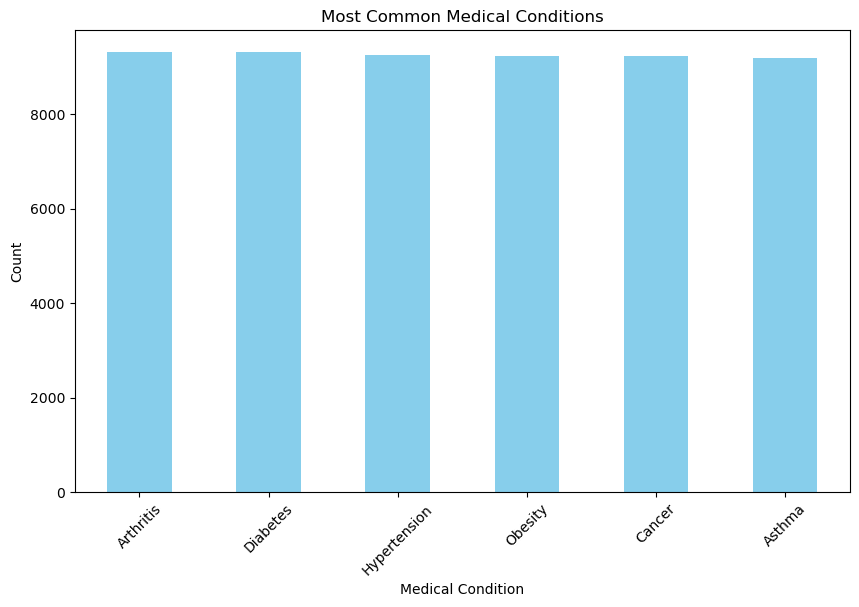

In [17]:
# EDA for medical conditions analysis
#count occurrences of each medical condition
condition_counts = data['Medical Condition'].value_counts()

#bar chart for medical conditions
import matplotlib.pyplot as plt

condition_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Most Common Medical Conditions")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

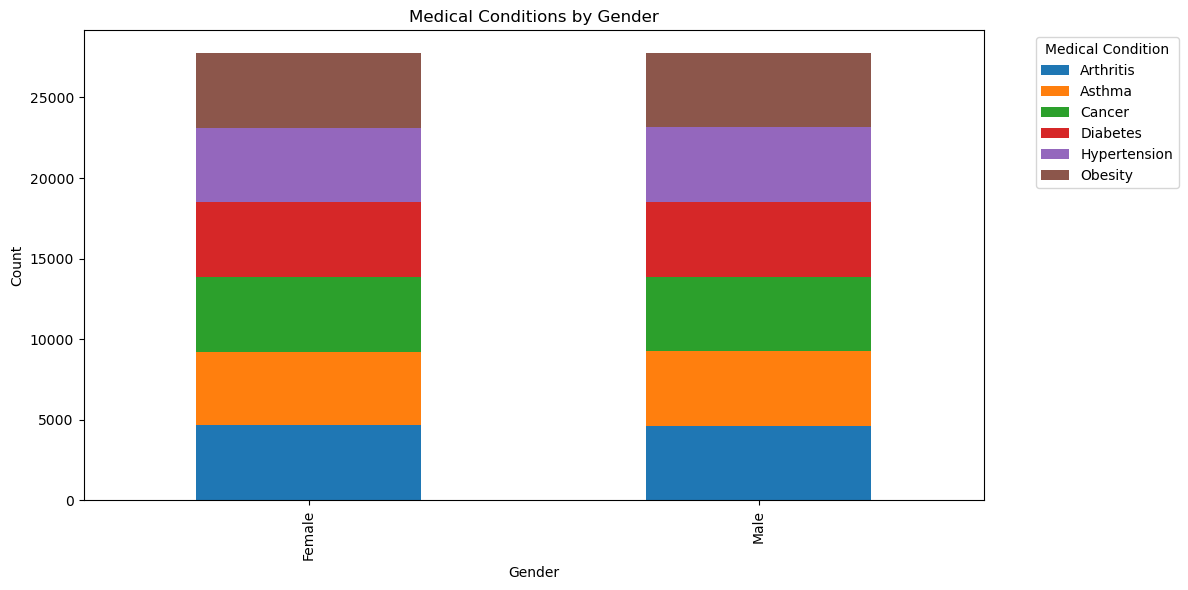

In [19]:
#medical conditions by gender
conditions_by_gender = data.groupby(['Gender', 'Medical Condition']).size().unstack()

#stacked bar chart- medical conditions by gender
conditions_by_gender.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Medical Conditions by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Medical Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/mz/4fl6pc3d705__67dbzvrpb6h0000gn/T/ipykernel_97451/966610993.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conditions_by_age = data.groupby(['Age Group', 'Medical Condition']).size().unstack()


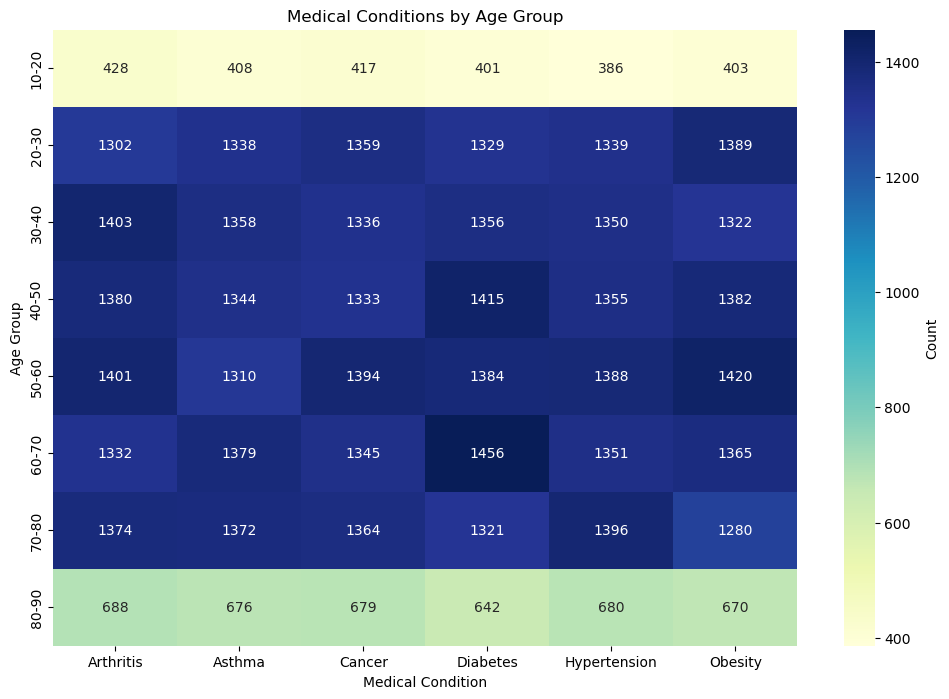

In [21]:
#grouping data by age & medical condition
data['Age Group'] = pd.cut(data['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
conditions_by_age = data.groupby(['Age Group', 'Medical Condition']).size().unstack()

#heatmap for medical conditions by age group
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(conditions_by_age, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title("Medical Conditions by Age Group")
plt.xlabel("Medical Condition")
plt.ylabel("Age Group")
plt.show()

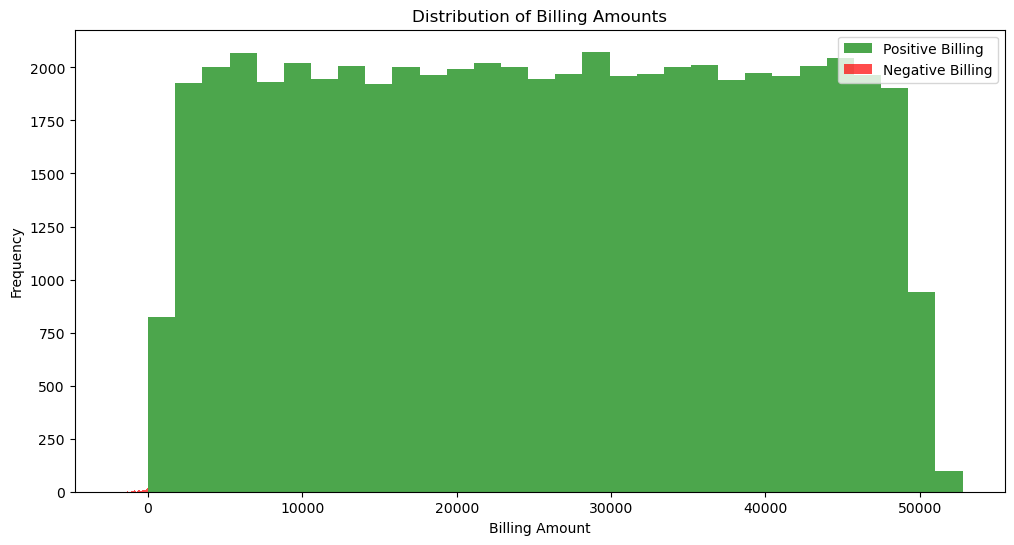

In [23]:
#EDA for billing trends:
#plot for positive and negative billing amounts
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(data[data['Billing Amount'] >= 0]['Billing Amount'], bins=30, alpha=0.7, label='Positive Billing', color='green')
plt.hist(data[data['Billing Amount'] < 0]['Billing Amount'], bins=30, alpha=0.7, label='Negative Billing', color='red')
plt.title("Distribution of Billing Amounts")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()


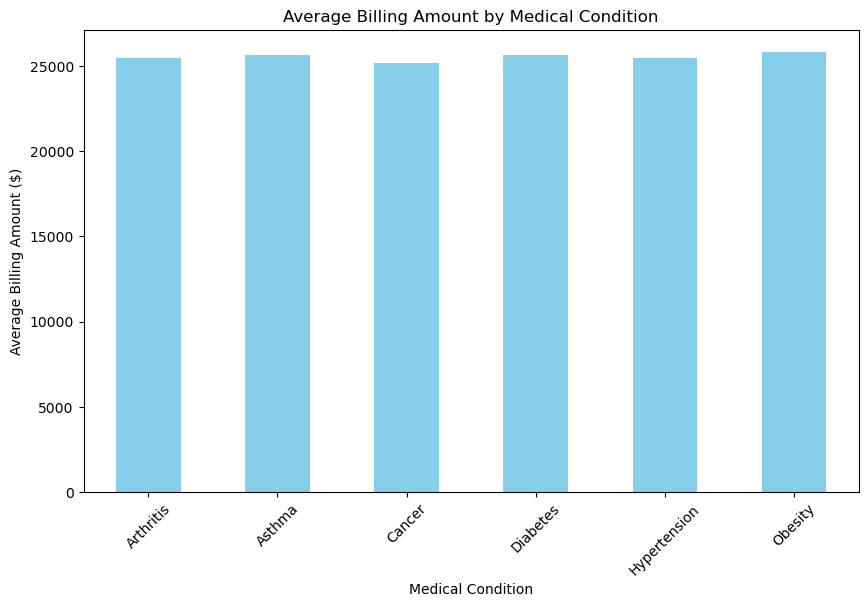

In [25]:
#average billing amount for each medical condition
billing_by_condition = data.groupby('Medical Condition')['Billing Amount'].mean()

#bar chart for billing by medical condition
billing_by_condition.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Average Billing Amount by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing Amount ($)")
plt.xticks(rotation=45)
plt.show()

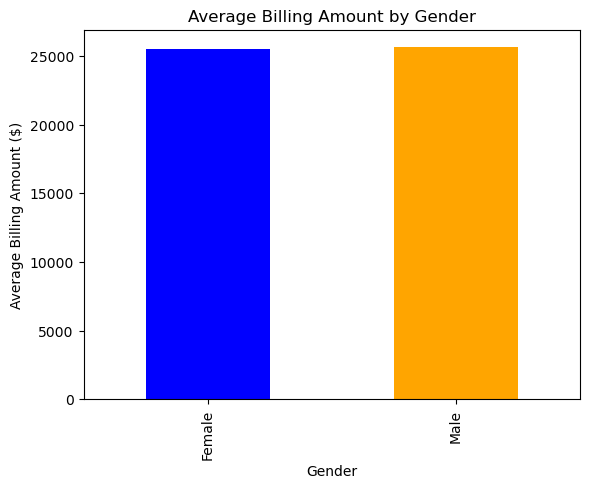

In [27]:
#average billing amount by gender
billing_by_gender = data.groupby('Gender')['Billing Amount'].mean()

#bar chart for billing by gender
billing_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Billing Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Billing Amount ($)")
plt.show()

/var/folders/mz/4fl6pc3d705__67dbzvrpb6h0000gn/T/ipykernel_97451/1554021437.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  billing_by_age = data.groupby('Age Group')['Billing Amount'].mean()


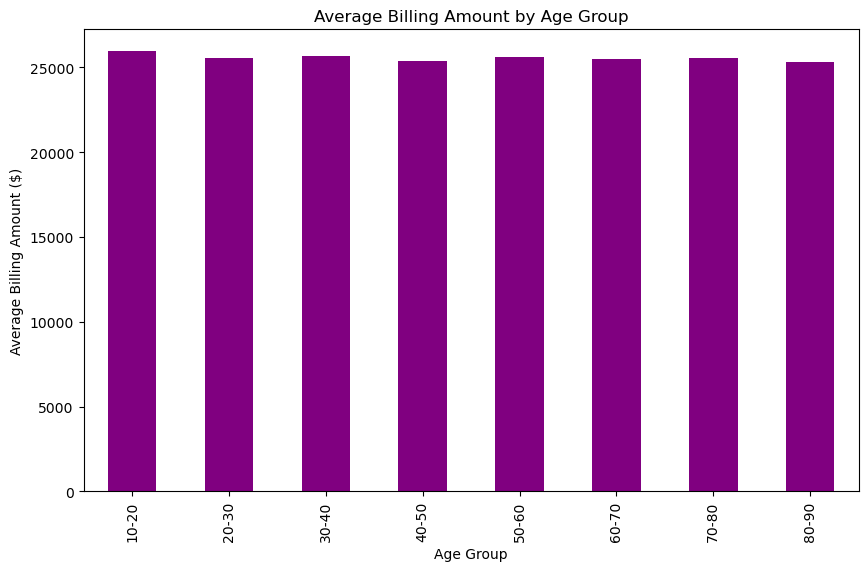

In [29]:
#average billing amount by age group
data['Age Group'] = pd.cut(data['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
billing_by_age = data.groupby('Age Group')['Billing Amount'].mean()

#bar chart for billing by age group
billing_by_age.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Average Billing Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Billing Amount ($)")
plt.show()

### Conclusion
This analysis of the healthcare dataset uncovered several key insights:

1. **Demographics**:
   - The dataset includes an evenly distributed representation of genders, with no significant disparity.
   - Blood types and medical conditions are equally represented, likely due to balanced data collection.

2. **Medical Conditions**:
   - Chronic conditions such as arthritis, hypertension, and diabetes are the most prevalent across age groups.
   - Age has a strong relationship with the prevalence of conditions, with middle-aged and older groups showing higher counts of chronic illnesses.

3. **Billing Trends**:
   - Billing amounts are consistent across gender, age groups, and medical conditions, averaging around $25,000. 
   - Negative billing amounts are rare and likely represent refunds or adjustments.

4. **Overall Observations**:
   - The dataset exhibits uniformity, which could indicate a standardized healthcare billing structure.

This project demonstrates skills in data cleaning, exploratory data analysis (EDA), and visualization using Python.
